Hejiatai 0
Hejiatai 1.40152e-06
Hejiatai 0.0272154
[[  3.20292000e-01   1.14600000e+00  -4.20000000e-02  -1.05000000e-01]
 [  2.90083000e-01   6.57000000e-01   3.43000000e-01   0.00000000e+00]
 [  3.94835000e-01   1.09900000e+00  -0.00000000e+00  -9.90000000e-02]
 [  2.72208000e-01   0.00000000e+00   8.59000000e-01   1.41000000e-01]
 [  3.77115000e-01   1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.56347000e-01   0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  4.13167000e-15   0.00000000e+00  -0.00000000e+00   1.00000000e+00]]
[[  7.51797000e-01   1.54000000e-01   7.54000000e-01   9.20000000e-02]
 [  7.82722000e-01   3.64000000e-01   6.36000000e-01   0.00000000e+00]
 [  1.24875000e-01   1.06400000e+00   0.00000000e+00  -6.40000000e-02]
 [  8.10861000e-01  -0.00000000e+00   8.64000000e-01   1.36000000e-01]
 [  1.22246000e-01   1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.28442000e-01   0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  2.72171000e-22   0.00

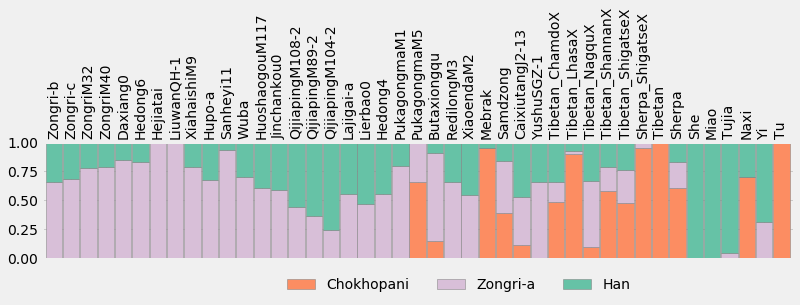

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
plt.style.use('fivethirtyeight')
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", # #"Wenpuju03",
     "Lajigai-a","Lierbao0","Hedong4"] #"Qunke1","Hupo8", #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1", #
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
eas=["She","Miao","Tujia","Naxi","Yi","Tu"]#,"Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX",'Tibetan','Sherpa']
atib=low+high+tib+eas
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/"
run="run5"
outsource=('1',"Chokhopani","Zongri-a","Han")
pats=['pat1','pat2','pat3','pat4','pat5','pat6','pat7']
targets=atib
outs=[]
mydat={}
logfile=open(pd+run+".qpAdm.out",'r')
for lineind,line in enumerate(logfile):
    if line[0]=="#": outs.append(line.split()[1].split(',')); continue
    x=line.split()
    if x[0]=="outgroup": header=x; continue
    if tuple(x[:4])!=outsource: continue
    mydat[x[4]]={}
    myary=np.zeros((7,4))
    for patind,pat in enumerate(pats):
        #mypat=x[header.index(pat)]
        myary[patind,0]=float(x[header.index("p_"+pat)])
        myary[patind,1]=float(x[header.index("1_"+pat)])
        myary[patind,2]=float(x[header.index("2_"+pat)])
        myary[patind,3]=float(x[header.index("3_"+pat)])
    mydat[x[4]] = myary.astype('float')

for i in range(3):
    if outsource[i] in atib: atib.remove(outsource[i])

fary=np.zeros((len(atib),3))
for target in atib:
    #print target
    if target not in mydat: print target; continue
    pval=0.05
    for i in range(7):
        if i<=3:
            #print i, mydat[target][i,0]
            if mydat[target][i,0]<pval: continue
            testneg=[1 for j in mydat[target][i,1:4] if j<0 or j>1]
            #print i, sum(testneg)
            if sum(testneg)>0: continue
            pval=mydat[target][i,0]
            fary[atib.index(target),:]=mydat[target][i,1:4]
            if i==0: break
        else:
            if pval != 0.05 and i==4: break
            if mydat[target][i,0]<pval: continue
            pval=mydat[target][i,0]
            fary[atib.index(target),:]=mydat[target][i,1:4]
    if sum(fary[atib.index(target),:])==0: 
        pval=0
        for i in range(7):
            if i<=3:
                if mydat[target][i,0]<pval: continue
                testneg=[1 for j in mydat[target][i,1:4] if j<0 or j>1]
                if sum(testneg)>0: continue
                pval=mydat[target][i,0]
                fary[atib.index(target),:]=mydat[target][i,1:4]
                if i==0: break
            else:
                if pval != 0.0 and i==4: break
                print target, pval
                if mydat[target][i,0]<pval: continue
                pval=mydat[target][i,0]
                fary[atib.index(target),:]=mydat[target][i,1:4]
print mydat["PukagongmaM5"]
print mydat["Butaxiongqu"]
print "Naxi"
print mydat["Naxi"]
fary=np.transpose(fary)
ind=np.arange(len(atib))
width=0.95
fig = plt.figure(figsize=(12,2))
ax1=fig.add_subplot(1,1,1)
p1=ax1.bar(ind,fary[0,:],width,align='center',color=(0.988, 0.553, 0.384),edgecolor='gray')
p2=ax1.bar(ind,fary[1,:],width,bottom=fary[0,:],align='center',color='thistle',edgecolor='gray')
p3=ax1.bar(ind,fary[2,:],width,bottom=fary[0,:]+fary[1,:],align='center',edgecolor='gray',color=(0.40, 0.76, 0.65))
ax1.set_xticks(ind)
ax1.set_xticklabels(atib,rotation=90,fontname='Helvetica')
ax1.set_ylim((0,1))
ax1.set_xlim((-0.7,len(atib)-0.3))
ax1.xaxis.tick_top()
plt.legend((p1[0],p2[0],p3[0]),('Chokhopani','Zongri-a','Han'),bbox_to_anchor=(0.8,-0.06),ncol=3,frameon=False)
plt.show()

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']
